In [1]:
exec(open("init_notebook.py").read())
import pyodrx 
import numpy as np
import extensions, junctions
import matplotlib.pyplot as plt
%matplotlib inline

current working dirF:\myProjects\av\junction-art


arcAngle: 108.0
clothAngle: 13.5
analizing roads 0 1
analizing roads 0 2
analizing roads 1 2
plotting xord: F:\myProjects\av\esmini\resources\xodr\pythonroad.xodr
opening matplot lib


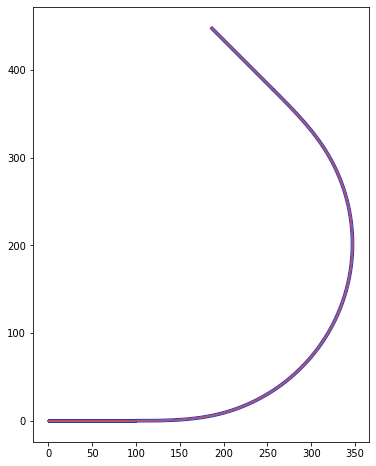

In [38]:
roadBuilder = junctions.RoadBuilder()
#1. create two arbitrary roads
roads = []
roads.append(pyodrx.create_straight_road(0))
# roads.append(pyodrx.create_straight_road(1, junction=1))
# roads.append(pyodrx.create_cloth_arc_cloth(.05, arc_angle=(np.pi - np.pi/4), cloth_angle=np.pi/8, r_id=1, junction = 1))
# roads.append(roadBuilder.createSimpleCurve(1, np.pi/4, True))
roads.append(roadBuilder.createSimpleCurveWithLongArc(1, np.pi/4, True, curvature = 0.005))
roads.append(pyodrx.create_straight_road(2))

roads[0].add_successor(pyodrx.ElementType.junction,1)

roads[1].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.end)
roads[1].add_successor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.start)

roads[2].add_predecessor(pyodrx.ElementType.junction,1)

#2. create a connection road

con1 = pyodrx.Connection(0,1,pyodrx.ContactPoint.start)
con1.add_lanelink(-1,-1)


#3. create junction
junction = pyodrx.Junction('test',1)
junction.add_connection(con1)

#4. make xord, add roads, add junctions, adjust

# create the opendrive
odr = pyodrx.OpenDrive('myroad')
for r in roads:
    odr.add_road(r)
    
# odr.create_junction()

odr.add_junction(junction)
odr.adjust_roads_and_lanes()

# pyodrx.prettyprint(odr.get_element())

extensions.view_road(odr,os.path.join('..','F:\\myProjects\\av\\esmini'))